In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Создаём выборку из описанных двумя признаками объектов четырёх классов. Каждому классу будет принадлежать один кластер, среди признаков нет повторяющихся и неинформативных.

In [3]:
features, target = datasets.make_classification(n_features=2, n_informative=2,n_redundant=0,n_repeated=0,n_classes=4,
                                                n_clusters_per_class=1)

Визуализируем сгенерированную выборку в виде точек на плоскости

In [4]:
import matplotlib

In [5]:
basic_colors = matplotlib.colors.ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

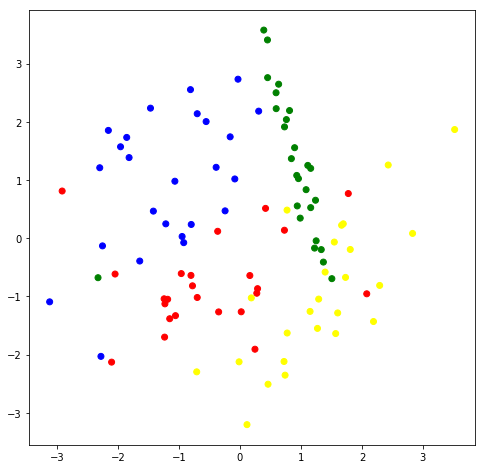

In [6]:
pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], features), map(lambda x: x[1], features), c = target, cmap=basic_colors)

Построим разделяющие поверхности методом $kNN$ с евклидовой метрикой для различных $k$.

In [7]:
from sklearn import neighbors
import numpy as np

In [8]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(sample, classes, n_of_neighbors):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_of_neighbors)
    clf.fit(sample, classes)
    
    pyplot.figure(figsize = (8, 8))
    
    xgrid, ygrid = get_meshgrid(sample)
    mesh_predictions = np.array(clf.predict(np.c_[xgrid.ravel(), ygrid.ravel()])).reshape(xgrid.shape)
    pyplot.pcolormesh(xgrid, ygrid, mesh_predictions, cmap = light_colors)
    pyplot.scatter(sample[:, 0], sample[:, 1], c = classes, s = 100, cmap = basic_colors)
    pyplot.title('Desision surface by kNN method, k = {}'.format(n_of_neighbors))

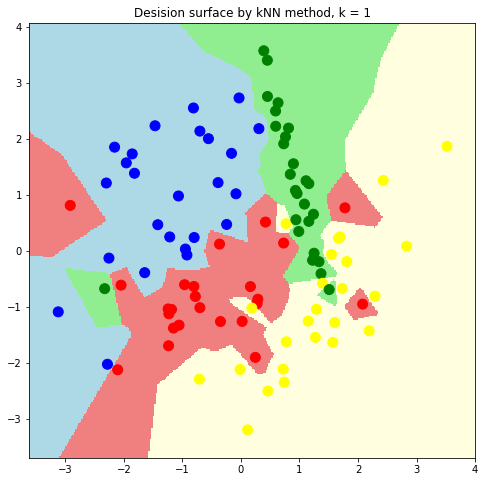

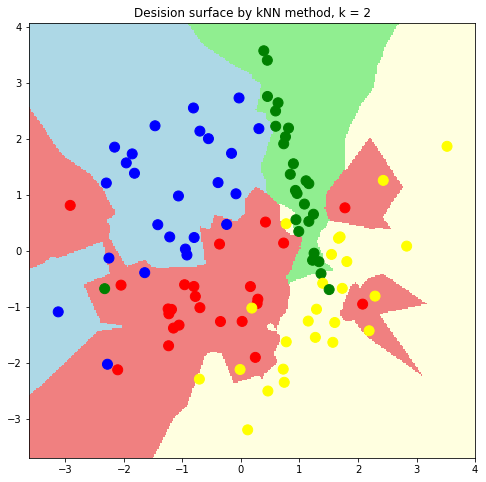

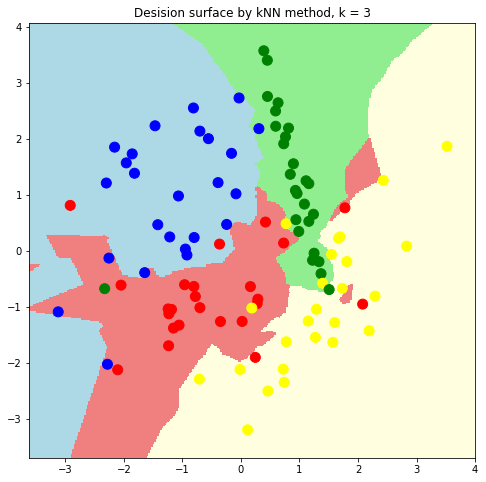

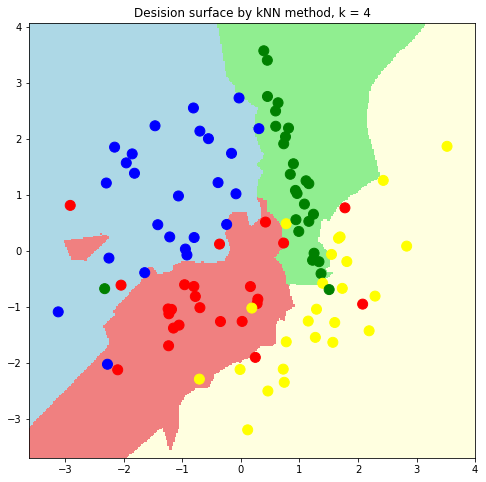

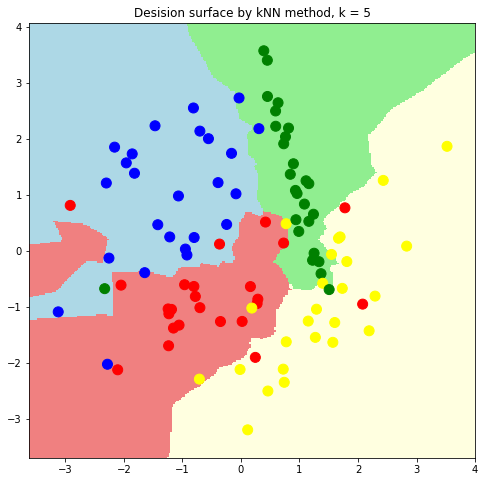

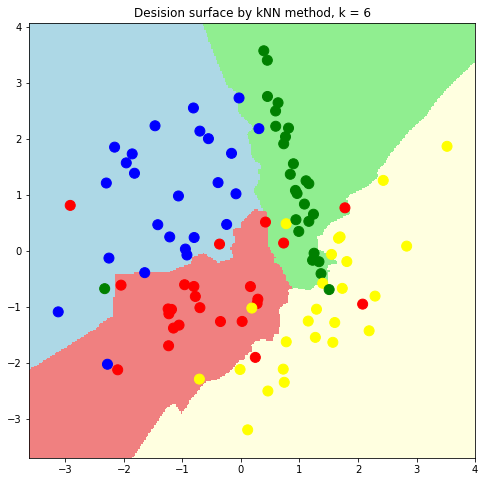

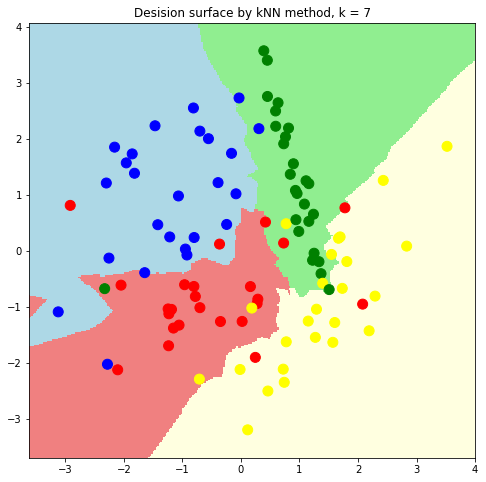

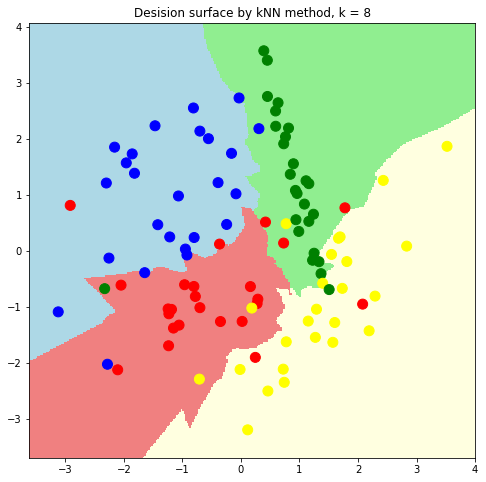

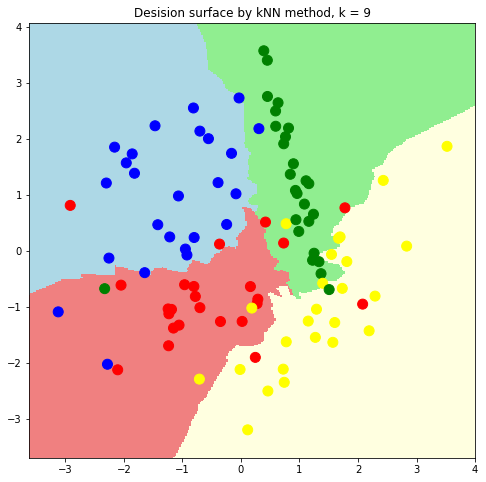

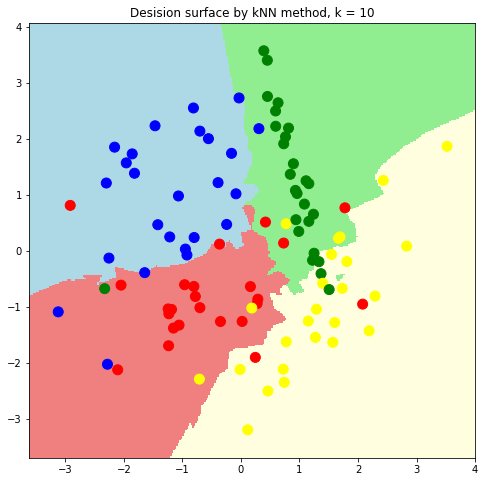

In [9]:
for n_of_neighbors in xrange(1,11):
    plot_decision_surface(features, target, n_of_neighbors)

Для различных $k$ определим метрику качества accuracy. Построим график её зависимости от $k$ для нахождения оптимального значения этого параметра. Воспользуемся стратегией 5-folds: будем разбивать выборку на 5 частей, обучаться на 4 из них и вычислять accuracy на оставшемся. Показателем качества будет среднее accuracy на всех пяти разбиениях при фиксированном $k$. Будем перебирать все возможные $k$, то есть от единицы до количества членов обучающей выборки минус один.

In [10]:
from sklearn import cross_validation
k_range=len(features)/5*4-1
scores=[]
for n_of_neighbors in xrange(1,k_range):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_of_neighbors)
    scores.append(cross_validation.cross_val_score(clf, features, target, scoring='accuracy', cv = 5))
#согласно документации, целочисленное значение параметра cv задаёт число разбиений в k-folds:
#cv : int, cross-validation generator or an iterable, optional
#Determines the cross-validation splitting strategy. Possible inputs for cv are:
#...integer, to specify the number of folds in a (Stratified)KFold...


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


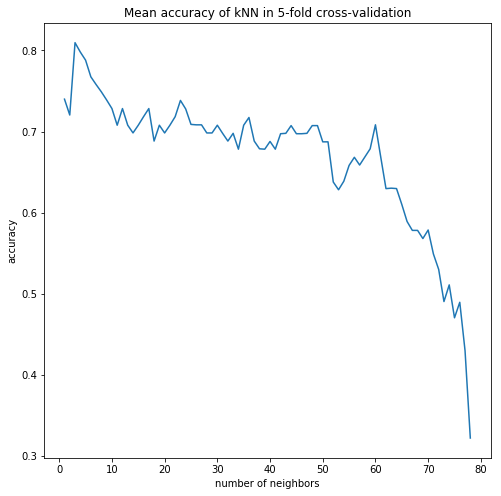

In [14]:
mean_accuracies=[np.mean(score_list) for score_list in scores]
pyplot.figure(figsize = (8, 8))
pyplot.plot(range(1,k_range), mean_accuracies)
pyplot.ylabel("accuracy")
pyplot.xlabel("number of neighbors")
pyplot.title("Mean accuracy of kNN in 5-fold cross-validation")

In [15]:
print(u"Как и ожидалось, оптимальными являются небольшие значения параметра k.")
print(u"На рассматриваемых данных оптимальным оказалось k={}".format(argmax(mean_accuracies)+1))
print(u"При этом accuracy достигает максимального значения {}".format(max(mean_accuracies)))

Как и ожидалось, оптимальными являются небольшие значения параметра k.
На рассматриваемых данных оптимальным оказалось k=3
При этом accuracy достигает максимального значения 0.809423558897
